## Let's Start new Competition!



A new contest has begun!!

How about seeing all the features before entering the competition?

In [ ]:
%%HTML
<a href="http://a.video.nfl.com//films/vodzilla/153321/Lechler_55_yd_punt-lG1K51rf-20181119_173634665_5000k.mp4">
    (2:57) (Punt formation) S.Lechler punts 48 yards to TEN 16, Center-J.Weeks. A.Jackson pushed ob at TEN 32 for 16
    yards (J.Jenkins).
</a>
<img src="https://s3.amazonaws.com/nonwebstorage/headstrong/animation_585_733_3.gif" width="650">

image from https://www.kaggle.com/jpmiller/nfl-punt-analytics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
import os
print(os.listdir('../input/nfl-big-data-bowl-2020'))

['kaggle', 'train.csv']


In [ ]:
from kaggle.competitions import nflrush
env = nflrush.make_env()

In [ ]:
%%time
train_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2020/train.csv', low_memory=False)
train_df.head()

CPU times: user 5.6 s, sys: 1.77 s, total: 7.36 s
Wall time: 7.33 s


GameId          PlayId  Team      X      Y     S     A   Dis  \
0  2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1  2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2  2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3  2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4  2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   

   Orientation     Dir  ...  Week           Stadium        Location  \
0        81.99  177.18  ...     1  Gillette Stadium  Foxborough, MA   
1        27.61  198.70  ...     1  Gillette Stadium  Foxborough, MA   
2         3.01  202.73  ...     1  Gillette Stadium  Foxborough, MA   
3       359.77  105.64  ...     1  Gillette Stadium  Foxborough, MA   
4        12.63  164.31  ...     1  Gillette Stadium  Foxborough, MA   

   StadiumType        Turf     GameWeather Temperature Humidity  WindSpeed  \
0      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
1      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
2      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
3      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
4      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   

   WindDirection  
0             SW  
1             SW  
2             SW  
3             SW  
4             SW  

[5 rows x 49 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509762 entries, 0 to 509761
Data columns (total 49 columns):
GameId                    509762 non-null int64
PlayId                    509762 non-null int64
Team                      509762 non-null object
X                         509762 non-null float64
Y                         509762 non-null float64
S                         509762 non-null float64
A                         509762 non-null float64
Dis                       509762 non-null float64
Orientation               509744 non-null float64
Dir                       509748 non-null float64
NflId                     509762 non-null int64
DisplayName               509762 non-null object
JerseyNumber              509762 non-null int64
Season                    509762 non-null int64
YardLine                  509762 non-null int64
Quarter                   509762 non-null int64
GameClock                 509762 non-null object
PossessionTeam            509762 non-null object
Down   

In [ ]:
train_df.describe(include='all')

GameId        PlayId    Team              X              Y  \
count   5.097620e+05  5.097620e+05  509762  509762.000000  509762.000000   
unique           NaN           NaN       2            NaN            NaN   
top              NaN           NaN    away            NaN            NaN   
freq             NaN           NaN  254881            NaN            NaN   
mean    2.017594e+09  2.017594e+13     NaN      60.040304      26.783535   
std     4.997098e+05  4.997098e+09     NaN      25.435261       7.238206   
min     2.017091e+09  2.017091e+13     NaN       0.660000       1.850000   
25%     2.017111e+09  2.017111e+13     NaN      39.090000      22.730000   
50%     2.017123e+09  2.017123e+13     NaN      60.290000      26.790000   
75%     2.018110e+09  2.018110e+13     NaN      80.970000      30.860000   
max     2.018123e+09  2.018123e+13     NaN     116.840000      56.450000   

                    S              A            Dis    Orientation  \
count   509762.000000  509762.000000  509762.000000  509744.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         2.591912       1.683176       0.279406     180.247779   
std          1.383601       0.976412       0.145482     104.298330   
min          0.000000       0.000000       0.000000       0.000000   
25%          1.500000       0.940000       0.170000      90.630000   
50%          2.470000       1.540000       0.270000     179.700000   
75%          3.560000       2.290000       0.390000     270.400000   
max          9.410000      14.710000       1.390000     360.000000   

                  Dir  ...           Week          Stadium  \
count   509748.000000  ...  509762.000000           509762   
unique            NaN  ...            NaN               55   
top               NaN  ...            NaN  MetLife Stadium   
freq              NaN  ...            NaN            21054   
mean       179.933859  ...       9.096370              NaN   
std        106.319488  ...       5.000984              NaN   
min          0.000000  ...       1.000000              NaN   
25%         89.830000  ...       5.000000              NaN   
50%        180.090000  ...       9.000000              NaN   
75%        270.190000  ...      14.000000              NaN   
max        360.000000  ...      17.000000              NaN   

                   Location  StadiumType    Turf  GameWeather    Temperature  \
count                509762       476828  509762       466114  461230.000000   
unique                   60           29      20           61            NaN   
top     East Rutherford, NJ      Outdoor   Grass       Cloudy            NaN   
freq                  30096       267696  166276       114466            NaN   
mean                    NaN          NaN     NaN          NaN      60.436442   
std                     NaN          NaN     NaN          NaN      17.570291   
min                     NaN          NaN     NaN          NaN       9.000000   
25%                     NaN          NaN     NaN          NaN      48.000000   
50%                     NaN          NaN     NaN          NaN      62.000000   
75%                     NaN          NaN     NaN          NaN      73.000000   
max                     NaN          NaN     NaN          NaN      97.000000   

             Humidity  WindSpeed  WindDirection  
count   503602.000000     442332         429528  
unique            NaN         40             53  
top               NaN          5             NE  
freq              NaN      53284          30250  
mean        55.646062        NaN            NaN  
std         25.430976        NaN            NaN  
min          0.000000        NaN            NaN  
25%         43.000000        NaN            NaN  
50%         59.000000        NaN            NaN  
75%         71.000000        NaN            NaN  
max 

## Data

- GameId - a unique game identifier
- PlayId - a unique play identifier
- Team - home or away
- X - player position along the long axis of the field. See figure below.
- Y - player position along the short axis of the field. See figure below.
- S - speed in yards/second
- A - acceleration in yards/second^2
- Dis - distance traveled from prior time point, in yards
- Orientation - orientation of player (deg)
- Dir - angle of player motion (deg)
- NflId - a unique identifier of the player
- DisplayName - player's name
- JerseyNumber - jersey number
- Season - year of the season
- YardLine - the yard line of the line of scrimmage
- Quarter - game quarter (1-5, 5 == overtime)
- GameClock - time on the game clock
- PossessionTeam - team with possession
- Down - the down (1-4)
- Distance - yards needed for a first down
- FieldPosition - which side of the field the play is happening on
- HomeScoreBeforePlay - home team score before play started
- VisitorScoreBeforePlay - visitor team score before play started
- NflIdRusher - the NflId of the rushing player
- OffenseFormation - offense formation
- OffensePersonnel - offensive team positional grouping
- DefendersInTheBox - number of defenders lined up near the line of scrimmage, spanning the width of the offensive line
- DefensePersonnel - defensive team positional grouping
- PlayDirection - direction the play is headed
- TimeHandoff - UTC time of the handoff
- TimeSnap - UTC time of the snap
- Yards - the yardage gained on the play (you are predicting this)
- PlayerHeight - player height (ft-in)
- PlayerWeight - player weight (lbs)
- PlayerBirthDate - birth date (mm/dd/yyyy)
- PlayerCollegeName - where the player attended college
- HomeTeamAbbr - home team abbreviation
- VisitorTeamAbbr - visitor team abbreviation
- Week - week into the season
- Stadium - stadium where the game is being played
- Location - city where the game is being player
- StadiumType - description of the stadium environment
- Turf - description of the field surface
- GameWeather - description of the game weather
- Temperature - temperature (deg F)
- Humidity - humidity
- WindSpeed - wind speed in miles/hour
- WindDirection - wind direction

In [ ]:
train_df.head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
0  2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1  2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2  2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3  2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4  2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   

   Orientation     Dir  ...  Week           Stadium        Location  \
0        81.99  177.18  ...     1  Gillette Stadium  Foxborough, MA   
1        27.61  198.70  ...     1  Gillette Stadium  Foxborough, MA   
2         3.01  202.73  ...     1  Gillette Stadium  Foxborough, MA   
3       359.77  105.64  ...     1  Gillette Stadium  Foxborough, MA   
4        12.63  164.31  ...     1  Gillette Stadium  Foxborough, MA   

   StadiumType        Turf     GameWeather Temperature Humidity  WindSpeed  \
0      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
1      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
2      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
3      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
4      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   

   WindDirection  
0             SW  
1             SW  
2             SW  
3             SW  
4             SW  

[5 rows x 49 columns]

CPU times: user 4.65 s, sys: 1.62 s, total: 6.27 s
Wall time: 5.96 s


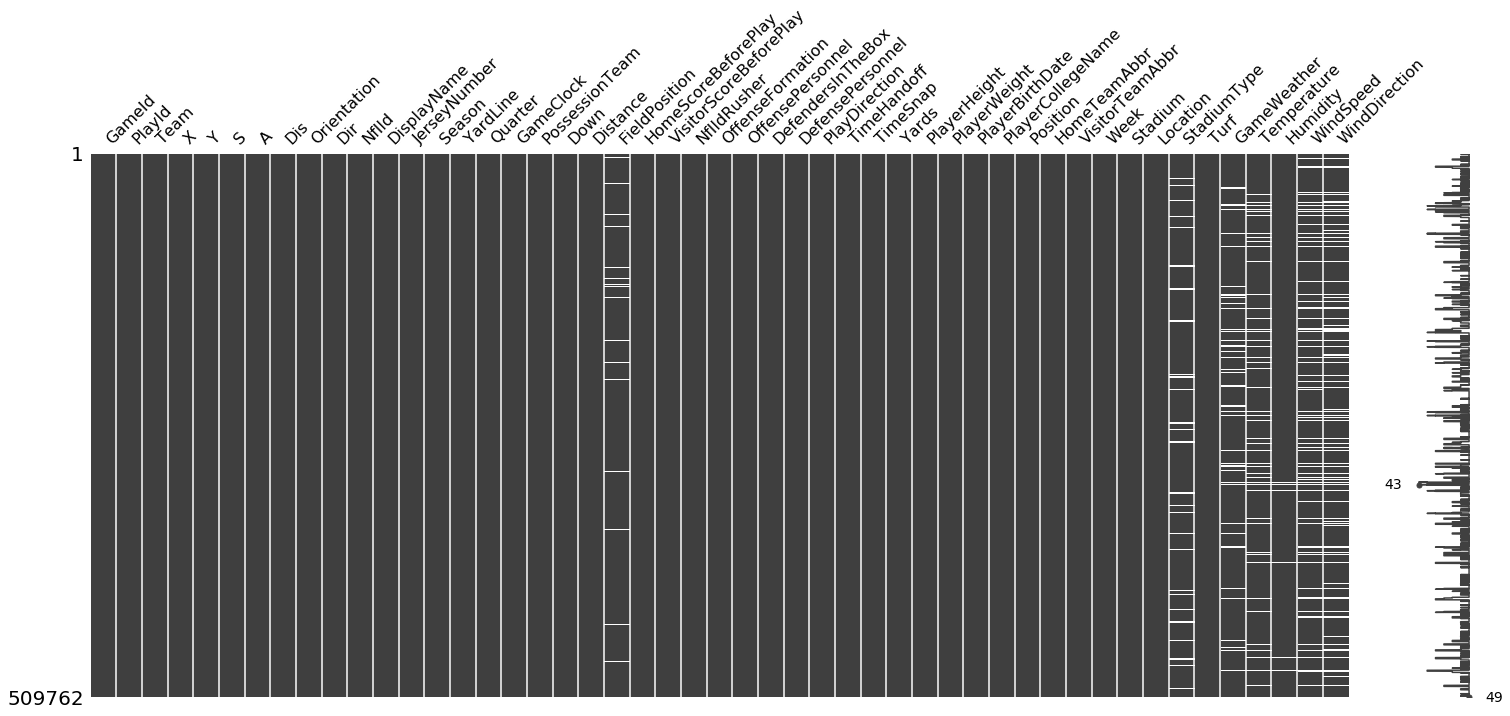

In [ ]:
%%time
import missingno as msno
msno.matrix(train_df)

## GameId & NflId

In [ ]:
%%time
print(len(train_df.GameId.unique()))
print(len(train_df.NflId.unique()))

512
2231
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.02 ms


Total 512 game describe in train dataset.

## PlayId & NflId

In [ ]:
%%time
print(len(train_df.PlayId.unique()))
print(len(train_df.NflId.unique()))

23171
2231
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.16 ms


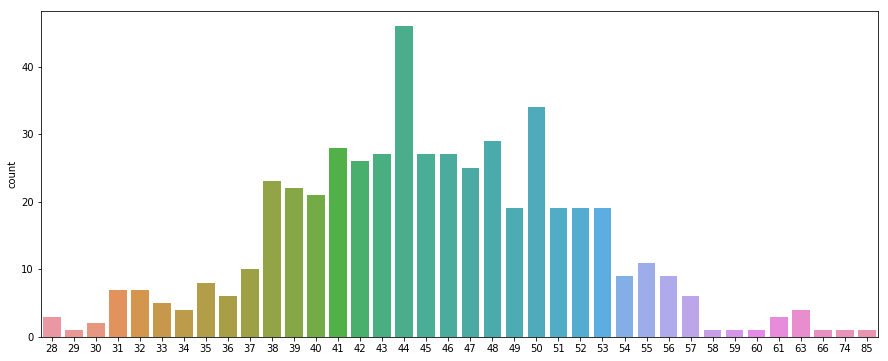

In [ ]:
play_id_unique = pd.Series([0 for i in range(512)])
for idx, i in enumerate(train_df.GameId.unique()):
    play_id_unique[idx] = len(train_df[train_df['GameId']==i].PlayId.unique())

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.countplot(play_id_unique, ax=ax)

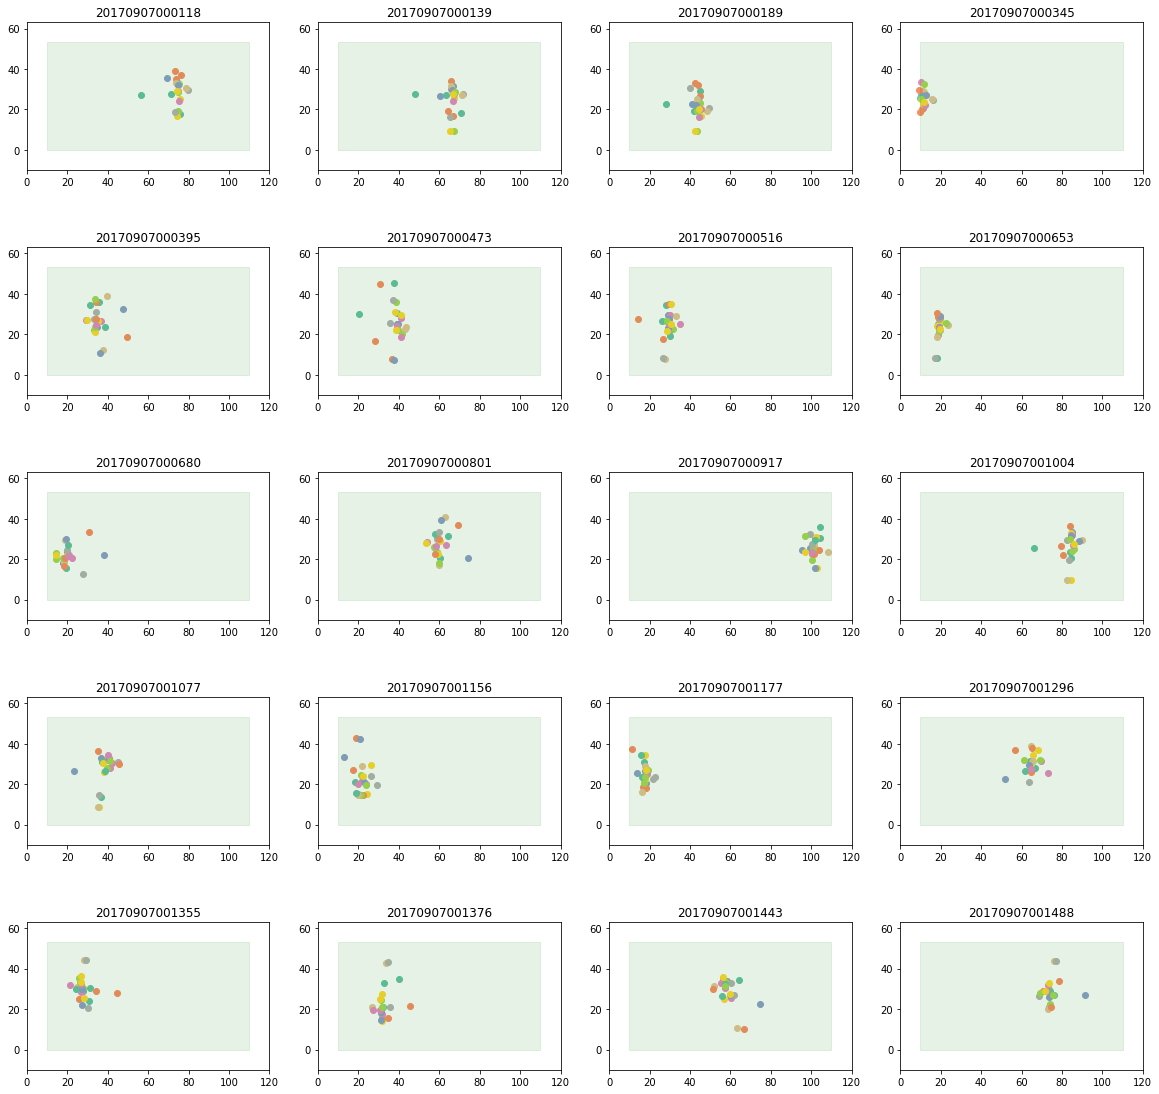

CPU times: user 5.01 s, sys: 96 ms, total: 5.1 s
Wall time: 5.1 s


In [ ]:
%%time
#https://www.kaggle.com/kmader/previewing-the-games

from matplotlib.patches import Rectangle
football_field = lambda : Rectangle(xy=(10, 0), width=100, height=53.3,  color='g',alpha=0.10)

fig, axes = plt.subplots(5, 4, figsize=(20, 20))
for (play_id, play_rows), ax in zip(train_df.groupby('PlayId'), axes.flatten()):
    ax.add_patch(football_field())
    for player_id, player_rows in play_rows.groupby('NflId'):
        player_rows = player_rows.sort_values('TimeSnap')
        ax.scatter(player_rows['X'], player_rows['Y'])
    ax.set_title(play_id)
    ax.set_aspect(1)
    ax.set_xlim(0, 120)
    ax.set_ylim(-10, 63)
plt.show()

## X and Y

In [ ]:
print((train_df.X.min(), train_df.Y.min()))
print((train_df.X.max(), train_df.Y.max()))

(0.66, 1.85)
(116.84, 56.45)


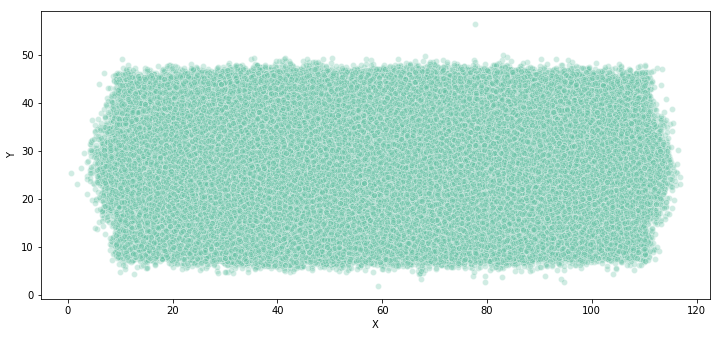

CPU times: user 8 s, sys: 4 ms, total: 8.01 s
Wall time: 7.96 s


In [ ]:
%%time
fig, ax = plt.subplots(1,1, figsize=(12, 5.3))
sns.scatterplot(x='X', y='Y', data=train_df, alpha=0.3)
plt.show()

without Outlier, it seams very normal or uniform distribution

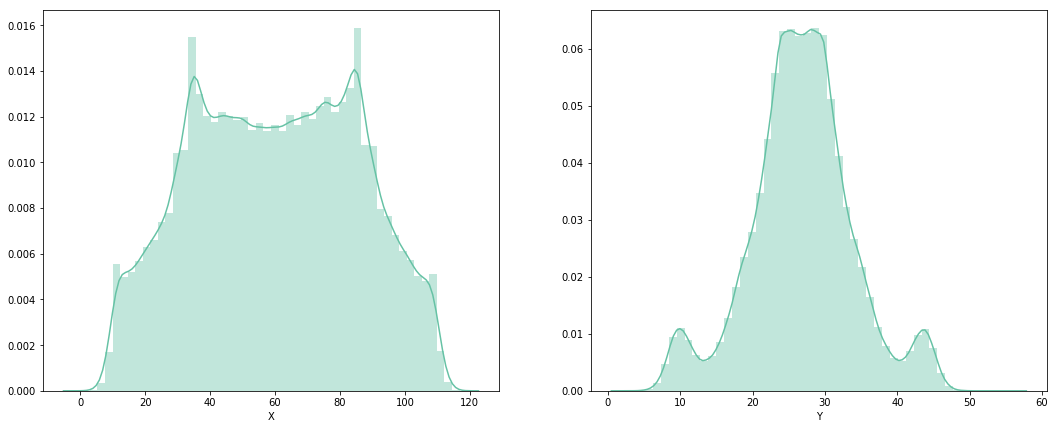

CPU times: user 1.14 s, sys: 24 ms, total: 1.16 s
Wall time: 1.03 s


In [ ]:
%%time
fig, ax = plt.subplots(1,2, figsize=(18, 7))
sns.distplot(train_df['X'], ax=ax[0])
sns.distplot(train_df['Y'], ax=ax[1])

plt.show()

## S & A (speed and acceleration)

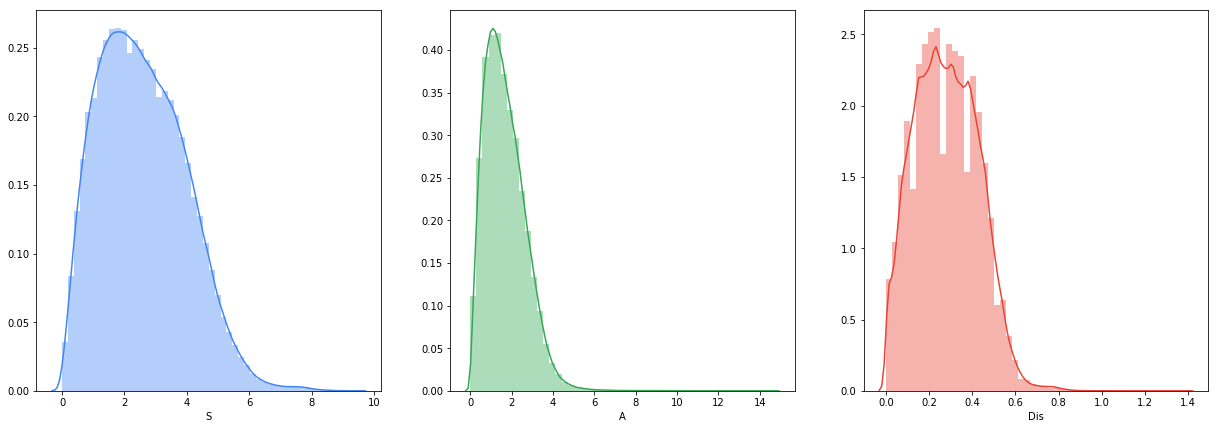

CPU times: user 1.55 s, sys: 4 ms, total: 1.55 s
Wall time: 1.3 s


In [ ]:
%%time
fig, ax = plt.subplots(1,3, figsize=(21, 7))
sns.distplot(train_df['S'], ax=ax[0], color="#4285f4")
sns.distplot(train_df['A'], ax=ax[1], color="#34a853")
sns.distplot(train_df['Dis'], ax=ax[2], color="#ea4335")

plt.show()

It seems skew. (have to preprocessing)

## PlayerHeight, PlayerWeight

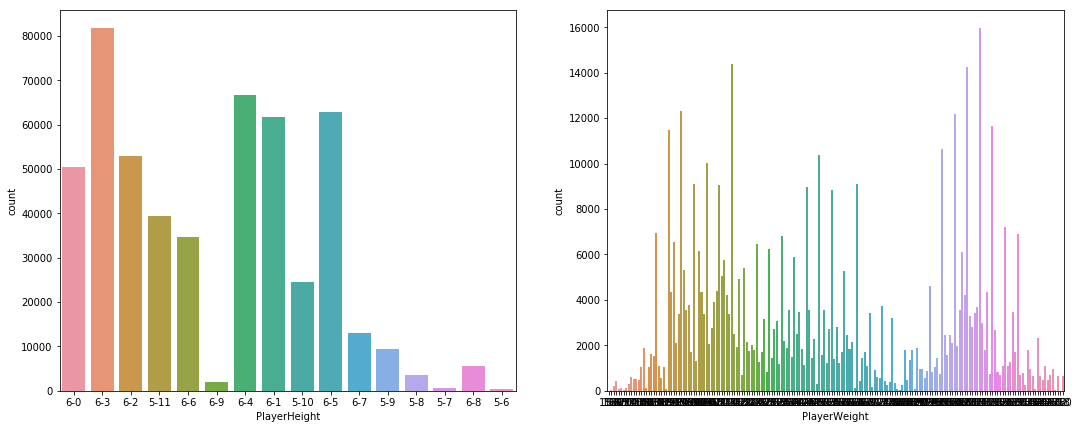

CPU times: user 2.93 s, sys: 140 ms, total: 3.07 s
Wall time: 3.07 s


In [ ]:
%%time
fig, ax = plt.subplots(1,2, figsize=(18, 7))
sns.countplot(train_df['PlayerHeight'], ax=ax[0])
sns.countplot(train_df['PlayerWeight'], ax=ax[1])

plt.show()

In [ ]:
%%time
def ftoi(str):
    a, b = map(int, str.split('-'))
    return a * 12 + b

train_df['PlayerHeight'] = train_df['PlayerHeight'].apply(ftoi)

CPU times: user 1.18 s, sys: 76 ms, total: 1.25 s
Wall time: 1.23 s


In [ ]:
train_df['PlayerHeight'].head()
train_df['PlayerWeight'].head()

0    212
1    288
2    270
3    245
4    206
Name: PlayerWeight, dtype: int64

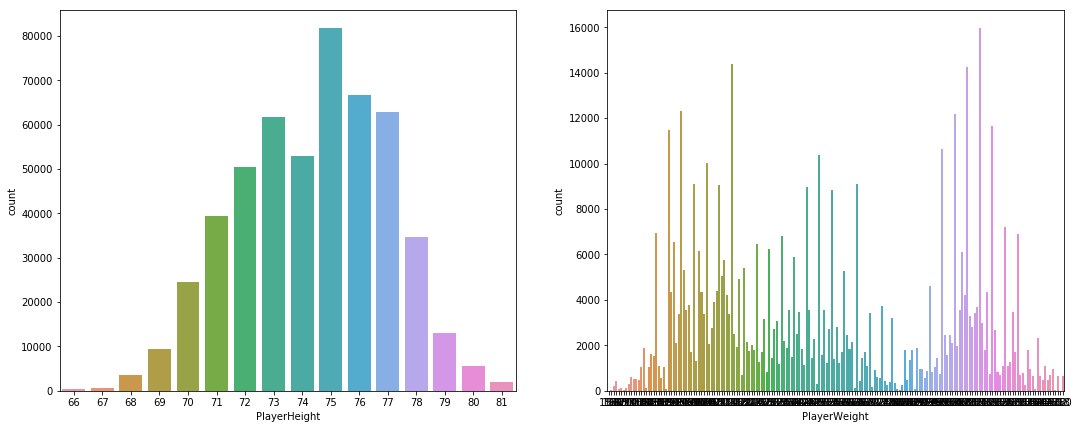

CPU times: user 2.74 s, sys: 100 ms, total: 2.84 s
Wall time: 2.84 s


In [ ]:
%%time
fig, ax = plt.subplots(1,2, figsize=(18, 7))
sns.countplot(train_df['PlayerHeight'], ax=ax[0])
sns.countplot(train_df['PlayerWeight'], ax=ax[1])

plt.show()

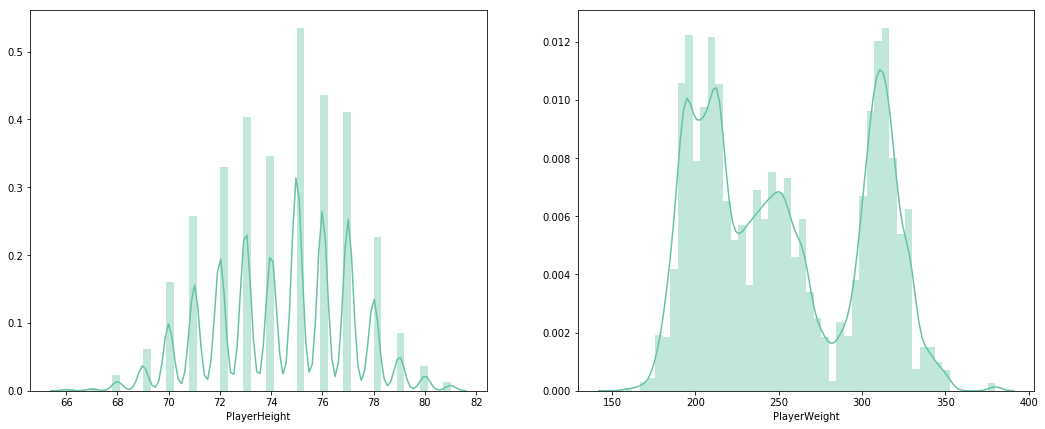

CPU times: user 984 ms, sys: 4 ms, total: 988 ms
Wall time: 821 ms


In [ ]:
%%time
fig, ax = plt.subplots(1,2, figsize=(18, 7))
sns.distplot(train_df['PlayerHeight'], ax=ax[0])
sns.distplot(train_df['PlayerWeight'], ax=ax[1])

plt.show()

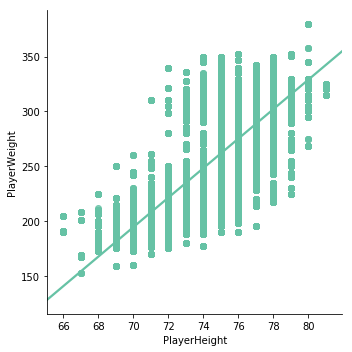

CPU times: user 1min 9s, sys: 300 ms, total: 1min 9s
Wall time: 40 s


In [ ]:
%%time
sns.lmplot(x='PlayerHeight', y='PlayerWeight', data=train_df, palette="Set3")
plt.show()

## PlayerBirthDate

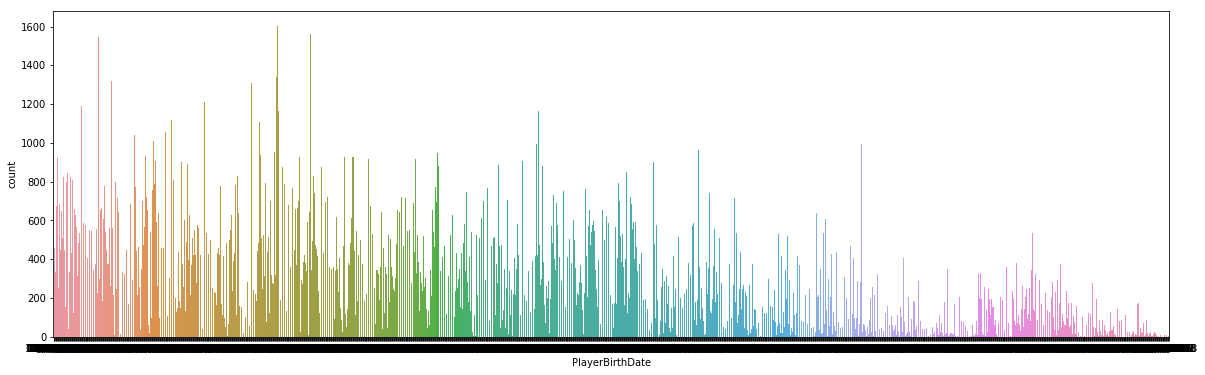

CPU times: user 22.1 s, sys: 2.06 s, total: 24.2 s
Wall time: 24.2 s


In [ ]:
%%time
fig, ax = plt.subplots(1,1, figsize=(20, 6))
sns.countplot(train_df['PlayerBirthDate'], ax=ax)
plt.show()

In [ ]:
print(min(train_df['PlayerBirthDate']), max(train_df['PlayerBirthDate']))

01/01/1985 12/31/1996


## PlayerCollegeName

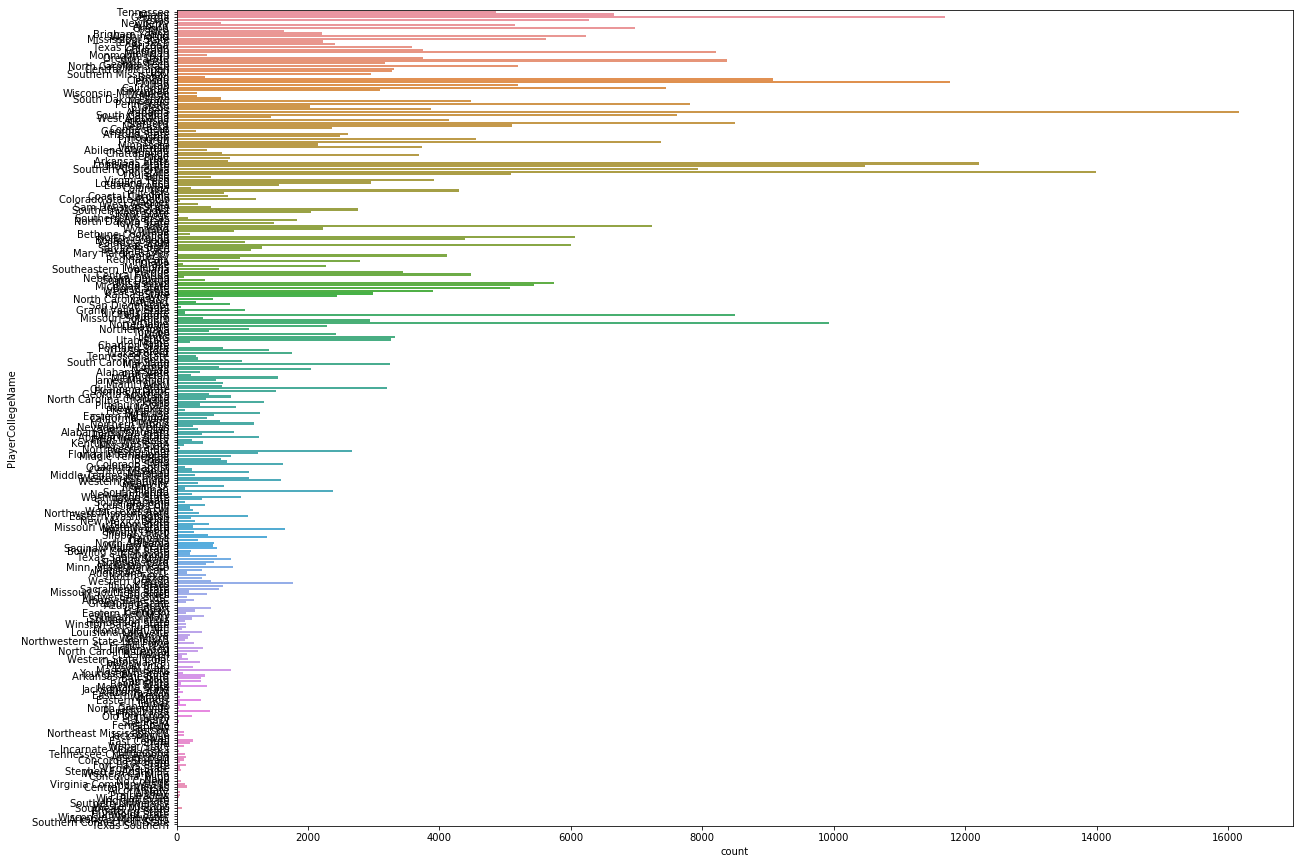

CPU times: user 4.74 s, sys: 436 ms, total: 5.17 s
Wall time: 5.17 s


In [ ]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.countplot(y='PlayerCollegeName', data=train_df, ax=ax)
plt.show()

In [ ]:
len(train_df.PlayerCollegeName.unique())

301

## Location

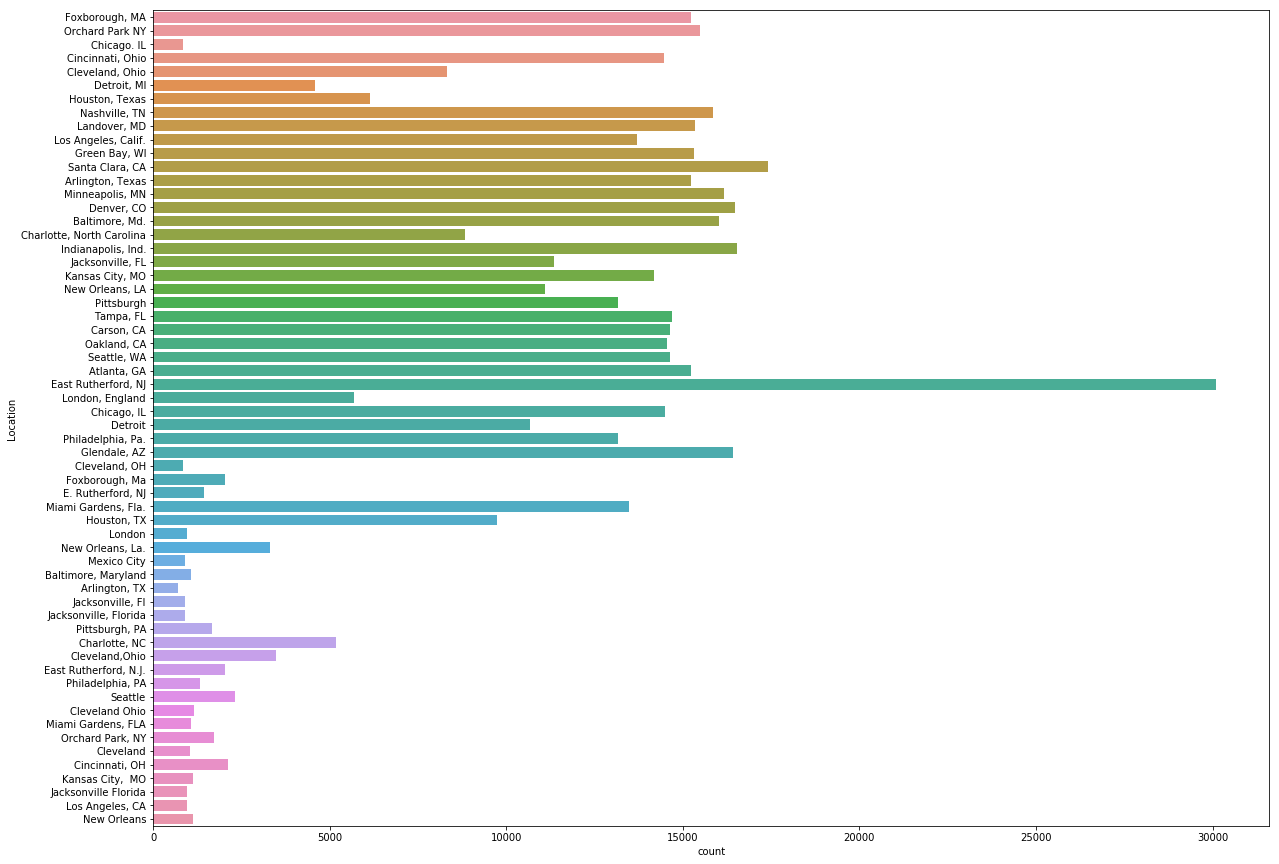

CPU times: user 1.22 s, sys: 92 ms, total: 1.31 s
Wall time: 1.31 s


In [ ]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.countplot(y='Location', data=train_df, ax=ax)
plt.show()

## Stadium

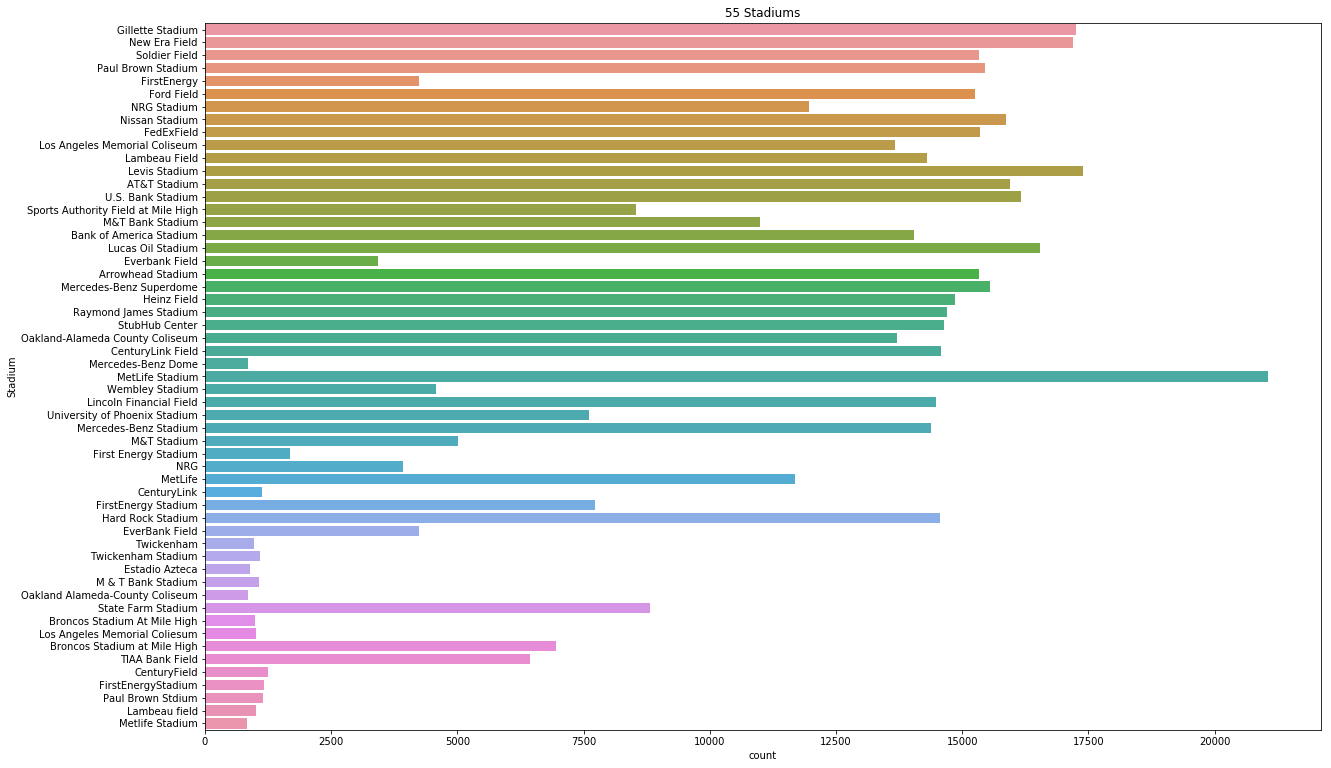

CPU times: user 1.28 s, sys: 84 ms, total: 1.36 s
Wall time: 1.36 s


In [ ]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(20,13))
sns.countplot(y='Stadium', data=train_df, ax=ax)
plt.title("{} Stadiums".format(len(train_df.Stadium.unique())))
plt.show()

## Stadium Type

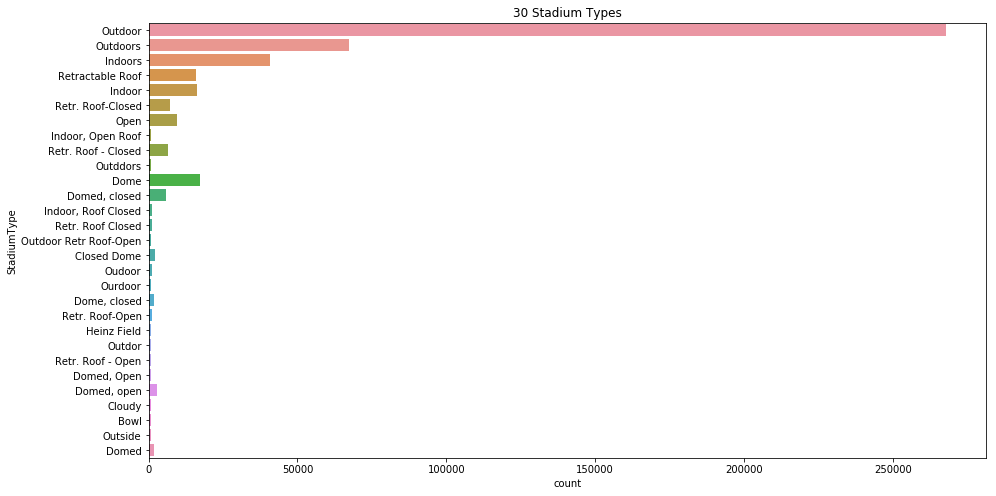

CPU times: user 600 ms, sys: 4 ms, total: 604 ms
Wall time: 601 ms


In [ ]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(y='StadiumType', data=train_df, ax=ax)
plt.title("{} Stadium Types".format(len(train_df.StadiumType.unique())))
plt.show()

## GameWeather

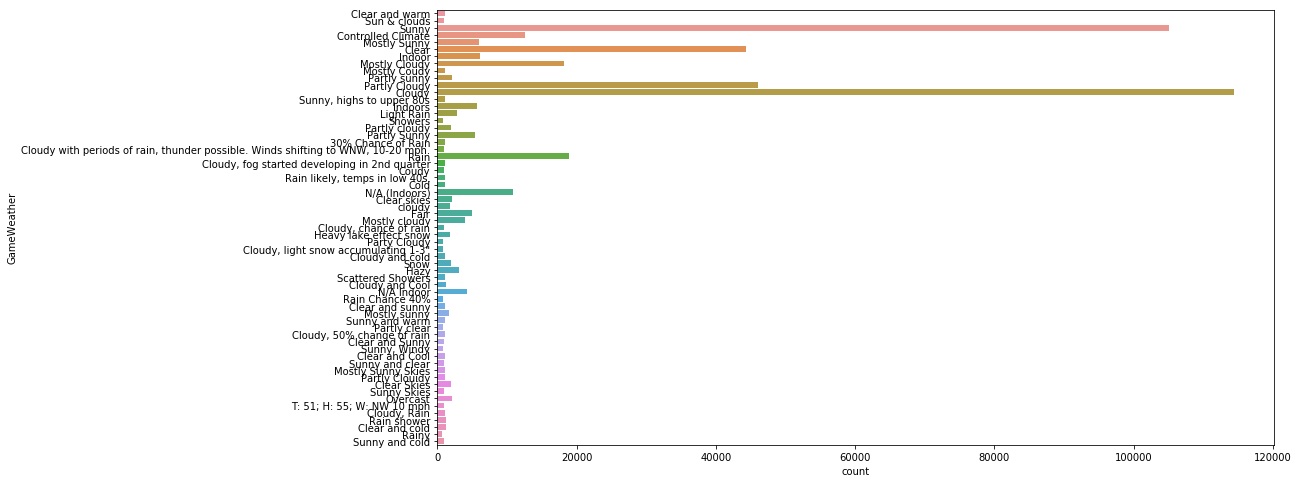

CPU times: user 1.21 s, sys: 80 ms, total: 1.29 s
Wall time: 1.29 s


In [ ]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(y='GameWeather', data=train_df, ax=ax)
plt.show()

It's hard to see.. How about WordCloud

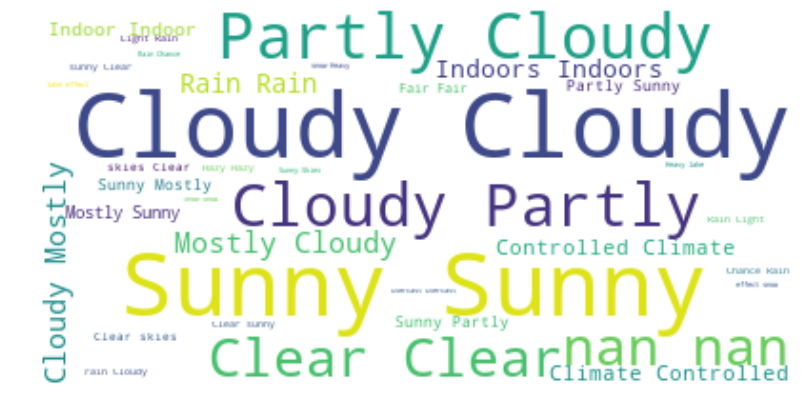

CPU times: user 2.56 s, sys: 68 ms, total: 2.63 s
Wall time: 2.65 s


In [ ]:
%%time
from wordcloud import WordCloud

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
train_df['GameWeather'] = train_df['GameWeather'].apply(str)
wordcloud = WordCloud(background_color='white').generate(" ".join(train_df['GameWeather']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Other Weather

- Temperature - temperature (deg F)
- Humidity - humidity
- WindSpeed - wind speed in miles/hour
- WindDirection - wind direction

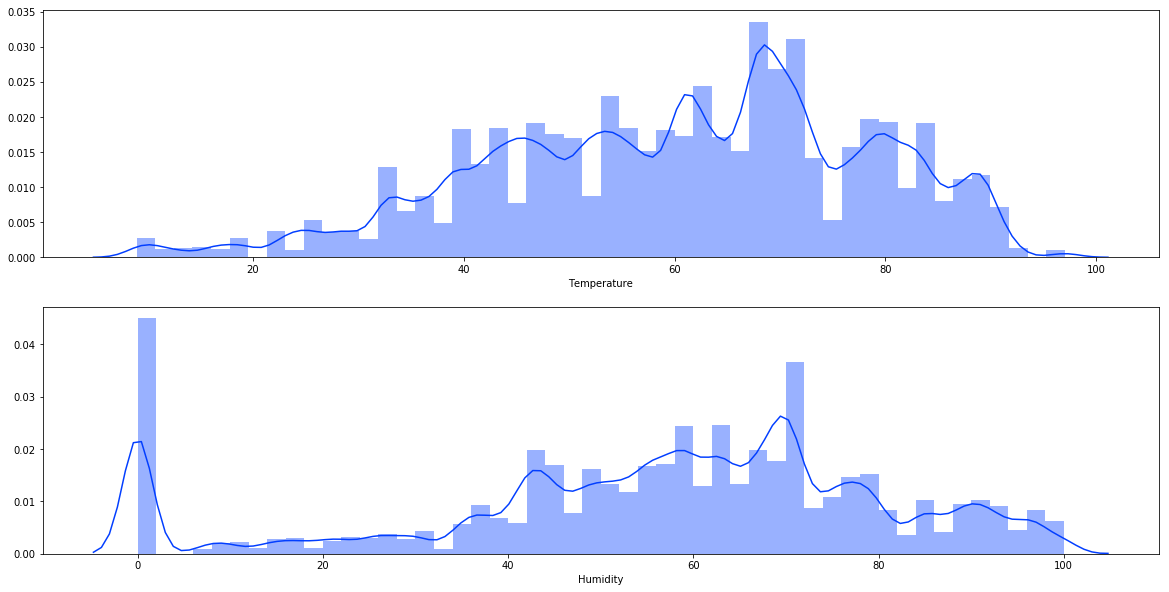

In [ ]:
sns.set_palette('bright')
fig, ax = plt.subplots(2,1,figsize=(20,10))
for idx, elem in enumerate(["Temperature" , "Humidity"]):
    sns.distplot(train_df[elem].dropna(), ax=ax[idx])
plt.show()

In [ ]:
train_df['WindSpeed'].unique()

array(['8', '6', '10', '9', '11', nan, '7', '5', '2', '12', '1', '3', '4',
       '13', '0', 'SSW', '14', '15', '17', '18', '16', '11-17', '23',
       '14-23', '13 MPH', '24', '12-22', '4 MPh', '15 gusts up to 25',
       '10MPH', '10mph', '22', 'E', '7 MPH', 'Calm', '6 mph', '19', 'SE',
       '20', '10-20', '12mph'], dtype=object)

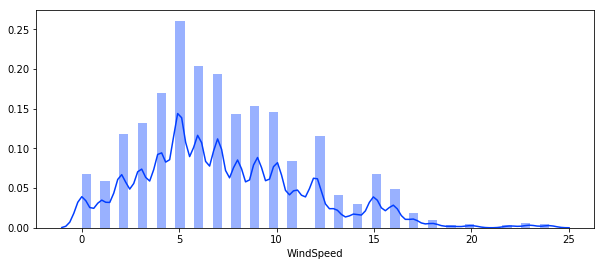

CPU times: user 1.15 s, sys: 84 ms, total: 1.24 s
Wall time: 1.15 s


In [ ]:
%%time
def numeric_check(s):
    s = str(s)
    if s.isnumeric():
        return int(s)
    return None

train_df["WindSpeed"] = train_df["WindSpeed"].apply(numeric_check)

fig, ax = plt.subplots(1,1,figsize=(10,4))
sns.distplot(train_df["WindSpeed"].dropna(),ax=ax)
plt.show()

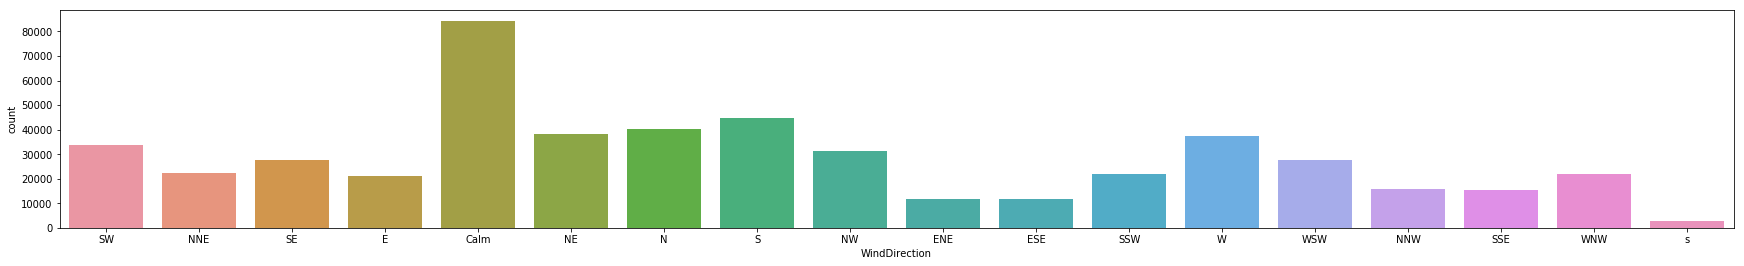

CPU times: user 3.98 s, sys: 8 ms, total: 3.98 s
Wall time: 3.98 s


In [ ]:
%%time
def direction_convert(s):
    s = str(s)
    for i in ['North', 'South', 'East', 'West']:
        s = s.replace(i, i[0])
        s = s.replace(i.lower(), i[0])
        s = s.replace(i.upper(), i[0])

    for i in ['-', 'from', 'From', '/', ' ']:
        s = s.replace(i,'')

    s.replace('s','S')
    if s.isnumeric() or s=='nan':
        s = "Calm"
    return s
fig, ax = plt.subplots(1,1,figsize=(30,4))
train_df["WindDirection"] = train_df["WindDirection"] .apply(direction_convert)
sns.countplot(train_df["WindDirection"] ,ax=ax)
plt.show()

## Heatmap(have to fill null data)

In [ ]:
%%time
import pandas_profiling
train_df.profile_report()

CPU times: user 21min 29s, sys: 55 s, total: 22min 24s
Wall time: 18min 17s
